In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./Data/cancer_classification.csv')
df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [6]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<AxesSubplot:>

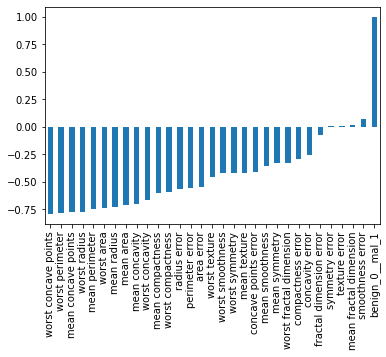

In [7]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

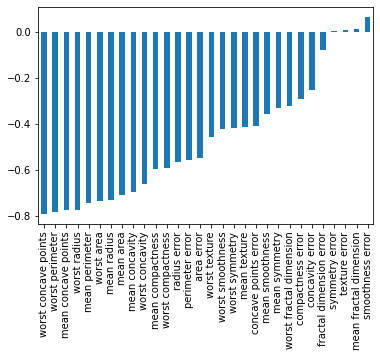

In [8]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

<AxesSubplot:>

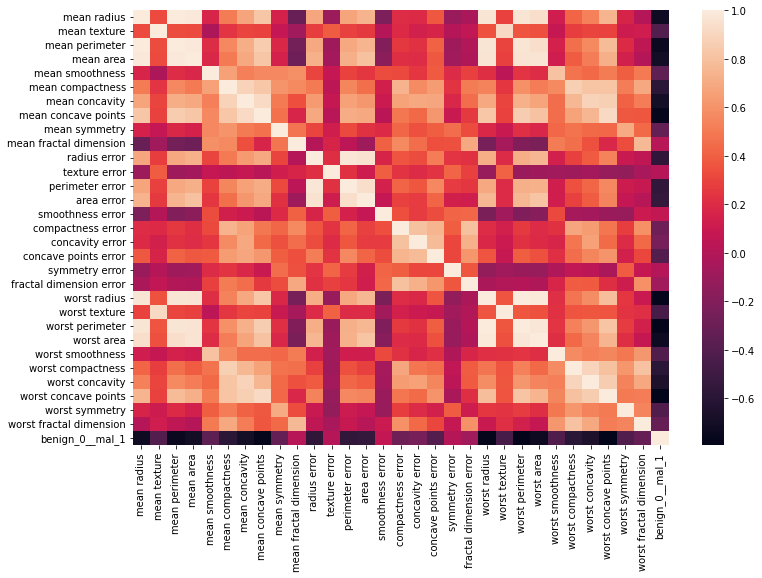

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

/home/atang/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

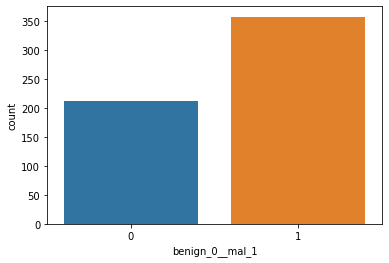

In [10]:
sns.countplot('benign_0__mal_1', data=df)

## Train Test set splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
X.shape

(569, 30)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=72)

In [15]:
X_test.shape

(143, 30)

## Preprocess the input Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
print(X_train)
print(X_test)

[[0.18595296 0.08927968 0.17517794 ... 0.10975945 0.0991984  0.09525427]
 [0.27351034 0.30875888 0.26314698 ... 0.28563574 0.21963928 0.14576789]
 [0.58777036 0.46635103 0.58952388 ... 0.53745704 0.25490982 0.17768911]
 ...
 [0.2522126  0.23030098 0.24462719 ... 0.2975945  0.19438878 0.17726462]
 [0.0575039  0.24112276 0.05473015 ... 0.08810997 0.29198397 0.16028525]
 [0.3757395  0.17653027 0.36390021 ... 0.39415808 0.20841683 0.23363613]]
[[0.12963226 0.28779168 0.11706171 ... 0.         0.05230461 0.08812293]
 [0.21860949 0.10585052 0.21111188 ... 0.29034364 0.2252505  0.27464131]
 [0.32367836 0.49983091 0.33542948 ... 0.52268041 0.40140281 0.53561423]
 ...
 [0.47796867 0.58978695 0.46582821 ... 0.53436426 0.27294589 0.30044995]
 [0.12717119 0.28373351 0.11934213 ... 0.08591065 0.28236473 0.19984719]
 [0.17364759 0.52451809 0.16736922 ... 0.21085911 0.35290581 0.22293913]]


## Model Creation and Training

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2022-08-17 14:50:19.365408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-17 14:50:19.365439: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
model=Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

2022-08-17 14:50:20.587447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-17 14:50:20.587484: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-17 14:50:20.587506: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (atang-HP-Pavilion-Laptop-15-cc0xx): /proc/driver/nvidia/version does not exist
2022-08-17 14:50:20.587740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6841 - val_loss: 0.6562
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6402 - val_loss: 0.6129
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5933 - val_loss: 0.5664
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5412 - val_loss: 0.5170
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4866 - val_loss: 0.4652
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4319 - val_loss: 0.4163
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3798 - val_loss: 0.3739
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3349 - val_loss: 0.3386
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2989 - val_loss: 0.3103
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2667 - val_loss: 0.2876
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.1865
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.1897
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.1875
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.1867
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.1891
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.1880
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.1886
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.1905
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.1904
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.1913
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.2255
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.2263
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.2275
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.2257
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.2254
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0318 - val_loss: 0.2268
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.2269
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.2262
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.2273
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.2264
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0238 - val_loss: 0.2586
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.2569
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.2602
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.2583
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.2635
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0437 - val_loss: 0.2621
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0332 - val_loss: 0.2544
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.2550
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.2555
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.2585
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.2933
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.2887
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.2884
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.2894
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.2886
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.2887
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.2973
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.2930
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.2925
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.2922
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.3197
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.3201
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.3240
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.3237
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.3253
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.3299
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.3304
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.3335
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.3324
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.3337
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.3765
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.3764
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.3796
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.3783
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.3824
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.3831
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.3813
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.3834
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.3839
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.3889
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.4636
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.4654
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.4623
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.4681
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.4685
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.4696
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.4720
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.4723
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.4753
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.4737
Epoc

In [24]:
model_loss=pd.DataFrame(model.history.history)

In [25]:
model_loss.head(10)

,loss,val_loss
0,0.684092,0.656161
1,0.640176,0.612877
2,0.593308,0.566357
3,0.541160,0.516951
4,0.486608,0.465177
5,0.431871,0.416298
6,0.379778,0.373893
7,0.334912,0.338572
8,0.298863,0.310338
9,0.266710,0.287602


<AxesSubplot:>

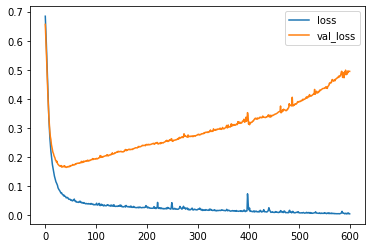

In [26]:
model_loss.plot()

## Solving the Overfitting using Callbacks and Dropout layers
### - Trying only the Early Stopping and seeing the results

In [27]:
model=Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [30]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6723 - val_loss: 0.6412
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6303 - val_loss: 0.6001
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5862 - val_loss: 0.5584
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5354 - val_loss: 0.5061
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4792 - val_loss: 0.4534
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4252 - val_loss: 0.4036
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3688 - val_loss: 0.3608
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3213 - val_loss: 0.3219
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2829 - val_loss: 0.2939
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2530 - val_loss: 0.2748
Epoch 11/

In [31]:
model_loss=pd.DataFrame(model.history.history)

In [32]:
model_loss.head()

,loss,val_loss
0,0.672271,0.641166
1,0.630327,0.600103
2,0.586231,0.558405
3,0.535434,0.506108
4,0.479174,0.453415


<AxesSubplot:>

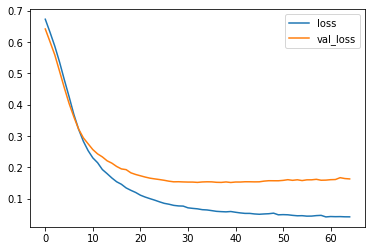

In [33]:
model_loss.plot()

### - Adding the Dropout layers to the Neural net and seeing the difference

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model =Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7061 - val_loss: 0.6762
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6698 - val_loss: 0.6587
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6754 - val_loss: 0.6445
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6516 - val_loss: 0.6301
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6344 - val_loss: 0.6145
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6230 - val_loss: 0.5995
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6056 - val_loss: 0.5800
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5925 - val_loss: 0.5582
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5828 - val_loss: 0.5355
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5591 - val_loss: 0.5108
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1096 - val_loss: 0.1425
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1134 - val_loss: 0.1475
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1407 - val_loss: 0.1412
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1412 - val_loss: 0.1422
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1129 - val_loss: 0.1413
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1365 - val_loss: 0.1408
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1166 - val_loss: 0.1416
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1109 - val_loss: 0.1417
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1083 - val_loss: 0.1417
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1182 - val_loss: 0.1414
Epoch 93/600


In [37]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

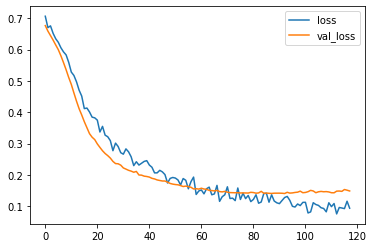

In [38]:
model_loss.plot()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions=(model.predict(X_test) > 0.5)*1

5/5 [==============================] - 0s 2ms/step


In [41]:
predictions

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
    

## Model Evalution for Binary Classification Problem

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [43]:
print(confusion_matrix(y_test, predictions))

[[51  4]
 [ 1 87]]


## Interesting :)